We will try to finish all tasks by Wednesday, when we meet again.
On Wednesday we will do Exercise 4 togheter.

### Exercise 1
- Part 1: all
- Part 2: Vetle
- Part 3: Imran
- Part 4: Jonas

### Exercise 2
- Part 1: Vetle
- Part 2: Vetle
- Part 3: Imran
- Part 4: Jonas

### Exercise 3, Part I
- Part 1: Imran
- Part 2: Imran
- Part 3: Jonas
- Part 4: Jonas
- Part 5: Vetle

### Exercise 3, Part II
- Part 1: Imran
- Part 2: Vetle

### Exercise 4
- Parts 1-4: All 

# Exercise 1 - Part 1



In [66]:
import sys; sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

`sys.float_info.max` is the largest number that can be represented as a 64-bit floating point number using the IEEE implementation.

`sys.float_info.max_exp` is the largest exponent in base 2 that the floating point number can store.

`sys.float_info.max_10_exp` is the largest exponent in base 10 that the floating point number can store.

`sys.float_info.min` is the smallet number that can be represented as a 64-bit floating point number.

`sys.float_info.min_exp` is the smallest exponent in base 2 that the floating point number can store.

`sys.float_info.min_10_exp` is the smallest exponent in base 10 that the floating point number can store.

`sys.float_info.dig` is the number of digits that can be distinguished in a decimal number. I.e. floating point numbers can be used to distinguish 15-digit decimal integers accurately. Above this, the precision cannot be guaranteed.

`sys.float_info.mant_dig` is the number of bits in the mantissa.

`sys.float_info.epsilon` is the difference between 1.0 and the next number that can be represented as a floating point number.

`sys.float_info.radix` is the base number that is used when calculating the exponent factor.

`sys.float_info.rounds` is the rounding mode.

# Exercise 1 - Part 4
1. No, generally we cannot use the double equals (==) operator to check for equality between two floats, because we cannot guarantee that a floating point is accurate to infinite precision. The only time this would work, is if the two floats are identical, i.e. their IEEE 754 representations are exactly the same. There are some finite floating numbers for which this is applicable, e.g. -999.25 (which is used as a NULL value in certain scenarios).
2. A better approach would be to use something like the `math.isclose` function. Or write an implementation by hand which checks that the absolute difference between the numbers is less than a given tolerance. Another way could be to truncate the floats and check the resulting strings, though this would be less precise.

# Exercise 2 - Part 4

In [67]:
import numpy as np
array_of_numbers = np.array([4, 8, 15, 16, 23, 42])
np.where(array_of_numbers > 17)[0]

array([4, 5], dtype=int64)

These are the indices for which the filter applied is true. We see that the 5th and 6th numbers, 23 and 42, both are greater than 17. Arrays are zero-indexed as normal.

In [68]:
np.where(array_of_numbers > 17, 1, 0)

array([0, 0, 0, 0, 1, 1])

This version of the `where` function works a bit differently. The `True` values of the first argument (`array_of_numbers > 17`) are replaced with the 2nd argument, and the `False` values are replaced with the 3rd argument. (If the 2nd and/or 3rd arguments were arrays themselves, the item at the corresponding index would be chosen instead.) The function is overloaded, and when only the condition is given, the following code is evaluated under the hood:

In [69]:
np.asarray(array_of_numbers > 17).nonzero()[0]

array([4, 5], dtype=int64)

# Exercise 3 - Part 3

In [70]:
def forward_difference_derivative(f, h=1e-2):
    return lambda x: (f(x + h) - f(x)) / h


def analytical_derivative_f(x, a=0.1, b=10):
    return b*np.cos(b*x)*np.exp(-a*x**2) - 2*a*x*np.sin(b*x)*np.exp(-a*x**2)


def f(x, a=0.1, b=10):
    return np.sin(b*x) * np.exp(-a * x**2)


print(f"{forward_difference_derivative(f)(1)=}")
print(f"{analytical_derivative_f(1)=}")

forward_difference_derivative(f)(1)=-7.220096595246589
analytical_derivative_f(1)=-7.493783027703379


# Exercise 3 - Part 4

In [71]:
def central_difference_derivative(f, h=1e-2):
    return lambda x: (f(x + h) - f(x - h)) / (2 * h)


print(f"{central_difference_derivative(f)(1)=}")

central_difference_derivative(f)(1)=-7.48156774953081


# Exercise 3 - Part 5

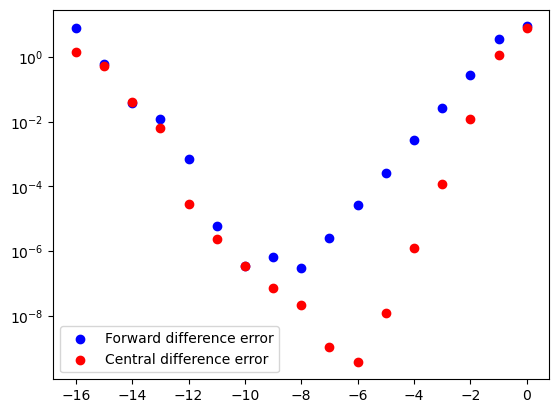

In [72]:
import matplotlib.pyplot as plt

step_size_lg = np.arange(-16, 1, dtype=float)
point = 1

error_fd = np.apply_along_axis(
    lambda h: np.abs(
        forward_difference_derivative(f, 10**h)(point)
        - analytical_derivative_f(point)
    ), 0, step_size_lg
)

error_cd = np.apply_along_axis(
    lambda h: np.abs(
        central_difference_derivative(f, 10**h)(point)
        - analytical_derivative_f(point)
    ), 0, step_size_lg
)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
error_fd_line = ax.scatter(step_size_lg, error_fd, color="b")
error_cd_line = ax.scatter(step_size_lg, error_cd, color="r")
ax.set_yscale("log")
ax.legend([error_fd_line, error_cd_line], 
          ["Forward difference error", "Central difference error"])

# Exercise 4 - Part 1

In [73]:
import rockhound as rh
import cmocean


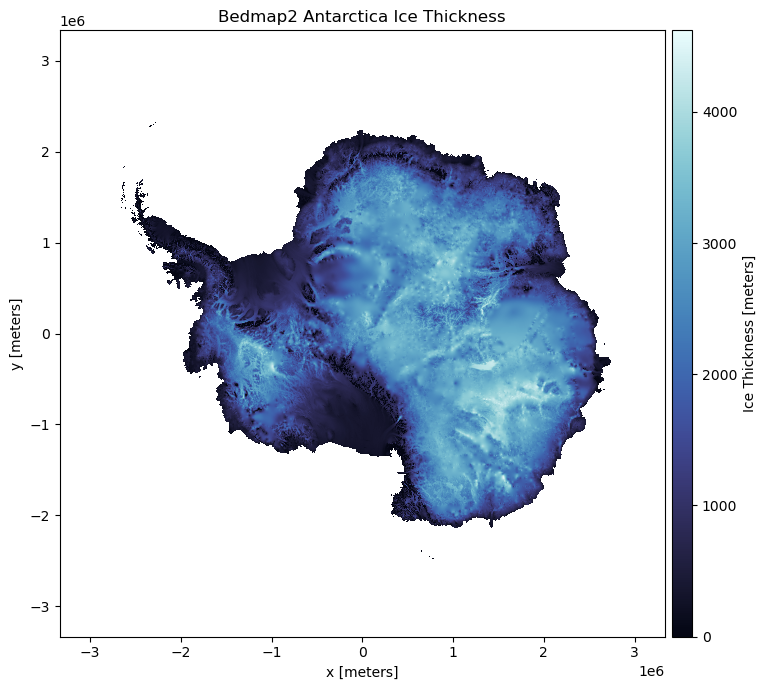

In [74]:
# Load the ice thickness grid
bedmap = rh.fetch_bedmap2(datasets=["thickness","surface","bed"])

plt.figure(figsize=(8, 7))
ax = plt.subplot(111)
pc = bedmap.thickness.plot.pcolormesh(
    ax=ax, cmap=cmocean.cm.ice, cbar_kwargs=dict(pad=0.01, aspect=30)
)
ax.set_title("Bedmap2 Antarctica Ice Thickness")
plt.tight_layout()
plt.show()



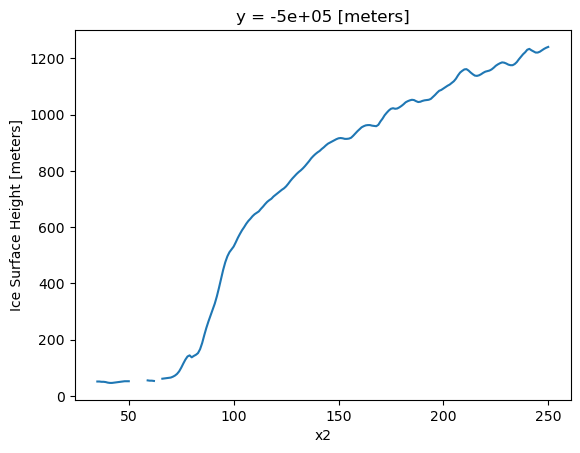

In [75]:
# Extract cross section using the original coordinates
bed1d = bedmap.sel(y=-0.5e6, x=slice(-1.6e6,-1.35e6))
# Add a second x-coordinate to make prettier plots
# (shift x-axis to start at zero, and convert from m to km)
bed1d = bed1d.assign_coords({"x2":((bed1d.x+1.6e6)/1e3)})
bed1d.surface.plot(x="x2")

In [76]:
rho_ice = 0.91
rho_water = 1.0
surface = bed1d.surface.values
thickness = bed1d.thickness.values
h = -(surface-thickness)*(rho_water/rho_ice-1)

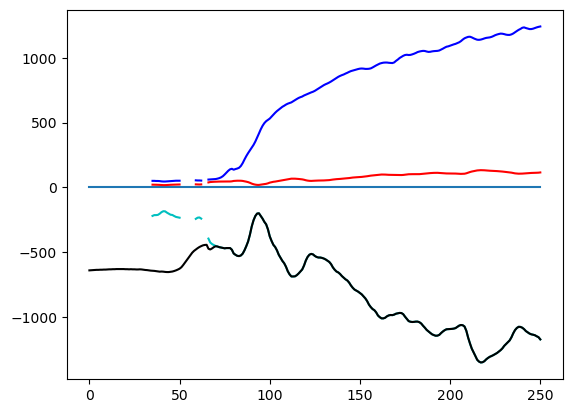

In [80]:
plt.figure()
ax = plt.subplot(111)

ax.plot(bed1d.surface.values, "-b")
ax.plot(np.zeros(bed1d.bed.values.shape))
ax.plot(h, "-r")
ax.plot(bed1d.surface.values - bed1d.thickness.values, "-c")
ax.plot(bed1d.bed.values, "-k")


Todo - part 2.3 explanation

# Exercise 2 - part 3

In [90]:
rho_ice = 0.91
rho_water = 1.0
surface  = bedmap.surface.values
thickness = bedmap.thickness.values 
freeboard_level = - (surface - thickness) * ((rho_water/rho_ice) -1)

ice_above_freeboard = surface - freeboard_level
ice_above_freeboard = ice_above_freeboard[~np.isnan(ice_above_freeboard)]

h_sum = np.sum(ice_above_freeboard)

earth_covered_by_sea = 3.61*10**8

sea_level_rise = h_sum/earth_covered_by_sea
print(sea_level_rise)

74.30384022288526
